# Explore correlation of genes
This notebook performs a first pass exploration of the data. In particular, this notebook examines the types of interactions that exist between genes and how coordinated groups of genes are: core-core, core-accessory, accessory-accessory 

In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

np.random.seed(123)

/home/alexandra/anaconda3/envs/core-acc/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
# User - which experiments to use
which_experiments = "PA14"

In [3]:
# Input
base_dir = os.path.abspath(os.path.join(os.getcwd(),"../"))

real_expression_file = os.path.join(
    base_dir,
    "pilot_experiment",
    "data",
    "input",
    "selected_"+which_experiments+"_normalized_data.tsv")

shuffled_expression_file = os.path.join(
    base_dir,
    "pilot_experiment",
    "data",
    "input",
    "shuffled_"+which_experiments+"_selected_normalized_data.tsv")

gene_annot_file = os.path.join(
    base_dir,
    "pilot_experiment",
    "data",
    "annotations",
    "selected_gene_annotations.txt")

In [4]:
# Output directory to store gene ids and correlation outputs
base_intermediate_dir = os.path.join(
    base_dir,
    "pilot_experiment",
    "data",
    "tmp")

In [5]:
# Read data
real_expression = pd.read_csv(
    real_expression_file,
    header=0,
    sep='\t',
    index_col=0)

shuffled_expression = pd.read_csv(
    shuffled_expression_file,
    header=0,
    sep='\t',
    index_col=0)

gene_annot = pd.read_csv(
    gene_annot_file,
    header=0,
    sep='\t',
    index_col=0)

real_expression.head()

,PA0001,PA0002,PA0003,PA0004,PA0005,PA0006,PA0007,PA0008,PA0009,PA0010,...,PA5561,PA5562,PA5563,PA5564,PA5565,PA5566,PA5567,PA5568,PA5569,PA5570
GSM591496.CEL,0.758438,0.808715,0.626747,0.774033,0.514039,0.383739,0.343325,0.719577,0.541627,0.216560,...,0.245720,0.671244,0.670357,0.767884,0.640626,0.151623,0.659674,0.643497,0.746590,0.707505
GSM591601.CEL,0.702824,0.755786,0.537629,0.755608,0.462175,0.316667,0.308082,0.704596,0.558551,0.160684,...,0.214021,0.653341,0.668257,0.686663,0.630709,0.182788,0.703150,0.649179,0.739723,0.728428
GSM591602.CEL,0.776721,0.736631,0.582667,0.749297,0.486610,0.302209,0.323932,0.782628,0.807336,0.225348,...,0.171650,0.560667,0.688716,0.699709,0.647261,0.163239,0.589900,0.649514,0.724675,0.696667
GSM591624.CEL,0.506639,0.700595,0.248761,0.454164,0.362564,0.251894,0.380947,0.398016,0.319026,0.246813,...,0.230838,0.593767,0.604794,0.354962,0.607041,0.178784,0.503754,0.432141,0.461649,0.577097
GSM591625.CEL,0.476276,0.661588,0.293446,0.465292,0.284225,0.184891,0.302357,0.201593,0.273987,0.405352,...,0.176900,0.516100,0.558197,0.261896,0.566213,0.221264,0.394161,0.366527,0.487899,0.624791


In [6]:
shuffled_expression.head()

,PA0001,PA0002,PA0003,PA0004,PA0005,PA0006,PA0007,PA0008,PA0009,PA0010,...,PA5561,PA5562,PA5563,PA5564,PA5565,PA5566,PA5567,PA5568,PA5569,PA5570
GSM591496.CEL,0.319915,0.157549,0.317593,0.415400,0.538228,0.373817,0.488309,0.205781,0.175246,0.255751,...,0.530105,0.163239,0.145875,0.458750,0.492834,0.598705,0.472902,0.733275,0.601172,0.240967
GSM591601.CEL,0.393157,0.151561,0.691745,0.182370,0.364308,0.431825,0.176045,0.710234,0.683143,0.089596,...,0.275104,0.349024,0.093188,0.557431,0.166742,0.241321,0.702366,0.178077,0.434584,0.398875
GSM591602.CEL,0.215542,0.223907,0.309650,0.354617,0.183374,0.777638,0.226075,0.168049,0.134435,0.465328,...,0.438138,0.162399,0.086098,0.171322,0.116789,0.736335,0.623370,0.546258,0.404974,0.241497
GSM591624.CEL,0.430274,0.160857,0.515737,0.520952,0.417124,0.379279,0.406532,0.330626,0.617315,0.303301,...,0.437297,0.472238,0.622241,0.602076,0.226453,0.593882,0.430208,0.514289,0.279352,0.580184
GSM591625.CEL,0.140305,0.488416,0.413951,0.090638,0.052694,0.533172,0.873518,0.755225,0.397175,0.226899,...,0.116875,0.352341,0.475461,0.028675,0.670809,0.234290,0.926435,0.102558,0.219635,0.668296


In [7]:
gene_annot.head()

,annotation
PAO1_gene_id,
PA0001,core
PA0002,core
PA0003,core
PA0004,core
PA0005,core


In [8]:
# Group genes by core and accessory annotation
core_gene_ids = list(gene_annot[gene_annot['annotation'] == 'core'].index)
acc_gene_ids = list(gene_annot[gene_annot['annotation'] == 'accessory'].index)

In [9]:
# Pickle gene ids
pickle.dump(core_gene_ids, open(
    os.path.join(
        base_intermediate_dir,
        "core_gene_ids.pickle"),
    "wb"))
pickle.dump(acc_gene_ids, open(
    os.path.join(
        base_intermediate_dir,
        "acc_gene_ids.pickle"),
    "wb"))

## Get groups of expression data

In [10]:
# Get core-core gene expression
real_core_expression = real_expression[core_gene_ids]

In [11]:
# Get accessory-accessory gene expression
real_acc_expression = real_expression[acc_gene_ids]

## Calculate correlation between gene profiles

In [12]:
# Get correlation of core-core genes
real_core_corr = real_core_expression.corr(method='pearson')

In [13]:
# Get correlation of accessory-accessory genes
real_acc_corr = real_acc_expression.corr(method='pearson')

In [14]:
# Get correlation of all genes
real_all_corr = real_expression.corr(method='pearson')

# Save 
pickle.dump(real_all_corr, open(
    os.path.join(
        base_intermediate_dir,
        "real_all_corr.pickle"),
    "wb"))

In [15]:
# Get correlation of core-accessory genes
real_core_acc_corr = real_all_corr.loc[core_gene_ids, acc_gene_ids]

In [16]:
# Get correlation of control dataset
shuffled_all_corr = shuffled_expression.corr(method='pearson')

# Save
pickle.dump(shuffled_all_corr, open(
    os.path.join(
        base_intermediate_dir,
        "shuffled_all_corr.pickle"),
    "wb"))

## Plot distribution of correlation scores

In [17]:
# Flatten and get only upper triangle values from correlation matrix
# Core gene correlations
real_core_corr_score = real_core_corr.values[np.triu_indices(n=len(real_core_corr), k=1)]
core_labels = np.repeat(['core'],len(real_core_corr_score))

real_core_corr_df = pd.DataFrame(data={'corr_score': real_core_corr_score,
                                      'group': core_labels})

print(real_core_corr_df.shape)
print('mean ', np.mean(real_core_corr_score))
print('median ', np.median(real_core_corr_score))
print('var ', np.var(real_core_corr_score))
real_core_corr_df.head()

(14297878, 2)
mean  0.006467688393984
median  0.004463728666424956
var  0.22592919000712336


,corr_score,group
0,0.299642,core
1,0.618058,core
2,0.268965,core
3,0.812734,core
4,-0.101251,core


In [18]:
# Flatten and get only upper triangle values from correlation matrix
# Accessory gene correlations
real_acc_corr_score = real_acc_corr.values[np.triu_indices(n=len(real_acc_corr), k=1)]
acc_labels = np.repeat(['accessory'],len(real_acc_corr_score))

real_acc_corr_df = pd.DataFrame(data={'corr_score': real_acc_corr_score,
                                     'group': acc_labels})

print(real_acc_corr_df.shape)
print('mean ', np.mean(real_acc_corr_score))
print('median ', np.median(real_acc_corr_score))
print('var ', np.var(real_acc_corr_score))
real_acc_corr_df.head()

(20100, 2)
mean  0.349180396529901
median  0.4673356067257173
var  0.17010594891484973


,corr_score,group
0,0.467488,accessory
1,0.461381,accessory
2,0.158595,accessory
3,0.498936,accessory
4,0.604890,accessory


In [19]:
# Flatten and get only upper triangle values from correlation matrix
# Core-accessory gene correlations
real_core_acc_corr_score = real_core_acc_corr.values.flatten().tolist()
core_acc_labels = np.repeat(['core-acc'],len(real_core_acc_corr_score))

real_core_acc_corr_df = pd.DataFrame(data={'corr_score': list(real_core_acc_corr_score),
                                           'group': core_acc_labels})

print(real_core_acc_corr_df.shape)
print('mean ', np.mean(real_core_acc_corr_score))
print('median ', np.median(real_core_acc_corr_score))
print('var ', np.var(real_core_acc_corr_score))
real_core_acc_corr_df.head()

(1074948, 2)
mean  -0.038398409708798514
median  -0.055631496099571326
var  0.22832649003208938


,corr_score,group
0,-0.571736,core-acc
1,-0.269728,core-acc
2,-0.242864,core-acc
3,-0.477746,core-acc
4,-0.574703,core-acc


In [20]:
# Flatten and get only upper triangle values from correlation matrix
# All gene correlations
real_all_corr_score = real_all_corr.values[np.triu_indices(n=len(real_all_corr), k=1)]
all_labels = np.repeat(['all'],len(real_all_corr_score))

real_all_corr_df = pd.DataFrame(data={'corr_score': real_all_corr_score,
                                     'group': all_labels})

print(real_all_corr_df.shape)
print('mean ', np.mean(real_all_corr_score))
print('median ', np.median(real_all_corr_score))
print('var ', np.var(real_all_corr_score))
real_all_corr_df.head()

(15392926, 2)
mean  0.0037820263574187647
median  0.0011750207855063784
var  0.22631043784276236


,corr_score,group
0,0.299642,all
1,0.618058,all
2,0.268965,all
3,0.812734,all
4,-0.101251,all


In [21]:
# Flatten and get only upper triangle values from correlation matrix
# Shuffled gene correlations
shuffled_all_corr_score = shuffled_all_corr.values[np.triu_indices(n=len(shuffled_all_corr), k=1)]
shuffled_all_labels = np.repeat(['shuffled'],len(real_all_corr_score))

shuffled_all_corr_df = pd.DataFrame(data={'corr_score': shuffled_all_corr_score,
                                          'group': shuffled_all_labels})

print(shuffled_all_corr_df.shape)
print('mean ', np.mean(shuffled_all_corr_score))
print('median ', np.median(shuffled_all_corr_score))
print('var ', np.var(shuffled_all_corr_score))
shuffled_all_corr_df.head()

(15392926, 2)
mean  0.005988708874978578
median  0.0027182593132893665
var  0.05401786786065027


,corr_score,group
0,-0.182980,shuffled
1,0.322616,shuffled
2,0.433927,shuffled
3,0.334774,shuffled
4,-0.127909,shuffled


In [22]:
# Create df
corr_scores_df = pd.concat([real_core_corr_df,
                            real_acc_corr_df,
                            real_core_acc_corr_df,
                            real_all_corr_df,
                            shuffled_all_corr_df],
                           ignore_index=True)

print(corr_scores_df.shape)
corr_scores_df.head()

(46178778, 2)


,corr_score,group
0,0.299642,core
1,0.618058,core
2,0.268965,core
3,0.812734,core
4,-0.101251,core


In [23]:
sns.set()

Text(0.5, 1.0, 'Distribution of correlation scores per group')

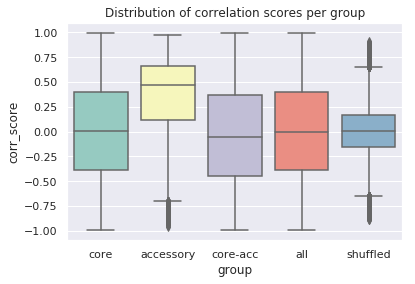

In [24]:
# Plot all correlation scores
sns.boxplot(data=corr_scores_df,
           x='group',
           y='corr_score',
           palette='Set3').set_title('Distribution of correlation scores per group')

/home/alexandra/anaconda3/envs/core-acc/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Probability Density')

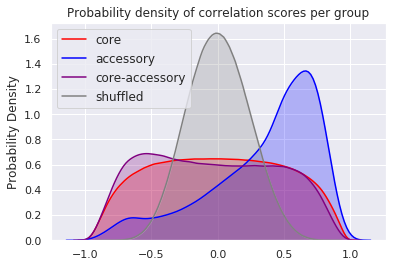

In [25]:
# Distribution plot for core genes
sns.distplot(real_core_corr_score, 
             label='core', 
             color='red',
             hist = False, 
             kde = True,
             kde_kws = {'shade': True}
            )

sns.distplot(real_acc_corr_score,
             label='accessory',
             color='blue',
             hist = False, 
             kde = True,
             kde_kws = {'shade': True}
            )
sns.distplot(real_core_acc_corr_score, 
             label='core-accessory', 
             color='purple',
             hist = False, 
             kde = True,
             kde_kws = {'shade': True}
            )
sns.distplot(shuffled_all_corr_score,
             label='shuffled', 
             color='grey',
             hist = False, 
             kde = True,
             kde_kws = {'shade': True}
            )

plt.legend(prop={'size': 12})
plt.title('Probability density of correlation scores per group')
plt.ylabel('Probability Density')

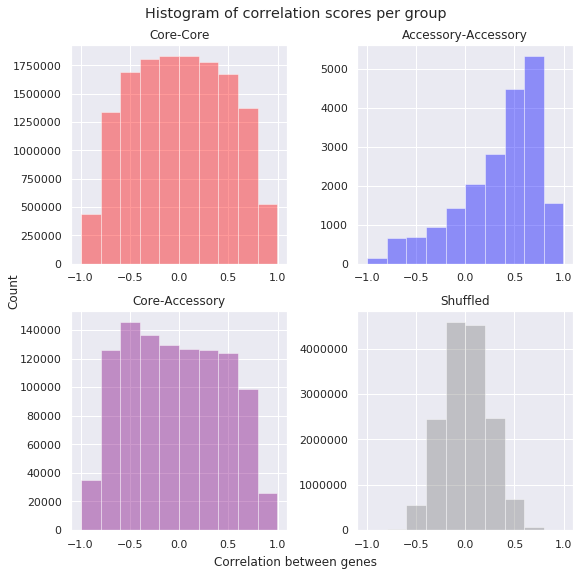

In [26]:
# Get bins using all data
hist, bins_corr = np.histogram(np.concatenate([real_core_corr_score,
                                              real_acc_corr_score,
                                              real_core_acc_corr_score,
                                              shuffled_all_corr_score]))

# Set up the matplotlib figure
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(8,8))

# Distribution plot for core genes
sns.distplot(real_core_corr_score, 
             label='core', 
             color='red',
             bins=bins_corr,
             kde=False,
             ax=axes[0,0]
            )

sns.distplot(real_acc_corr_score,
             label='accessory',
             color='blue',
             bins=bins_corr,
             kde=False,
             ax=axes[0,1]
            )
sns.distplot(real_core_acc_corr_score, 
             label='core-accessory', 
             color='purple',
             bins=bins_corr,
             kde=False,
             ax=axes[1,0]
            )
sns.distplot(shuffled_all_corr_score,
             label='shuffled', 
             color='grey',
             bins=bins_corr,
             kde=False,
             ax=axes[1,1]
            )

plt.suptitle('Histogram of correlation scores per group')
axes[0,0].set_title('Core-Core')
axes[0,1].set_title('Accessory-Accessory')
axes[1,0].set_title('Core-Accessory')
axes[1,1].set_title('Shuffled')
fig.text(0.5, 0.01, 'Correlation between genes', ha='center', fontsize=12)
fig.text(0.01, 0.5, 'Count', ha='center', rotation=90, fontsize=12)
plt.tight_layout(pad=0.4, 
                 w_pad=0.5,
                 h_pad=1.0,
                 rect=[0, 0.03, 1, 0.95])

**Note about visualizations:**
* Based on the density plot, we observed a shift in the accessory-accessory gene correlation scores. This density plot represents the probability of a random variable falling within a particular range of values (P(0 <= X <= 0.5)). This probability is given by the integral of this variable's PDF over that range -- that is it is given by the area under the density function. So there is a higher likelihood of correlation scores > 0.5 for accessory-accessory genes compared to core-core genes. But the *exact probability* of accessory-accessory genes having a correlation score > 0.5 is not known from just visually inspecting the density plot. To get the exact probability we would need to calculate the integral from 0.5 onward.
* While the shift if very clear to see in the density plot, the meaning of the y-axis is not as intuitive, so we also plot histograms for each group of genes. The histogram also shows a shift in the accessory-accessory gene correlation scores and also shows that the number of accessory-accessory interactions is orders of magnitude lower compared to core-core interactions.

https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0

**Some sanity checks:**
* Shuffled dataset has very little correlation between genes, as expected since we have disrupted the inherent relationships between genes through our permutation process
* Since core genes comprise 97% of the total genes, the mean correlation for all genes is the same as the core gene set

**Overall observations:**
* Looking at the density plot for the accessory-accessory gene correlation scores, the scores are shifted to the right.
* The shift in acc-acc genes having higher correlation scores is more prominent in mixed sample datasets (`which_experiment == 'All'`). This shift is especially prominent in the PA14-only dataset (`which_experiment == 'PA14'`), where the accessory genes are absent.

## Examine expression of genes per group
**Question**
Is the reason for this shift because the accessory genes are absent = expression values for those accessory genes are all very low with little variance?

In [27]:
# Get mean, max, min expression per core gene
mean_real_core_expression = real_core_expression.mean()
max_real_core_expression = real_core_expression.max()
min_real_core_expression = real_core_expression.min()

In [28]:
# Get mean, max, min expression per accessory gene
mean_real_acc_expression = real_acc_expression.mean()
max_real_acc_expression = real_acc_expression.max()
min_real_acc_expression = real_acc_expression.min()

Text(0.5, 0, 'Mean gene expression')

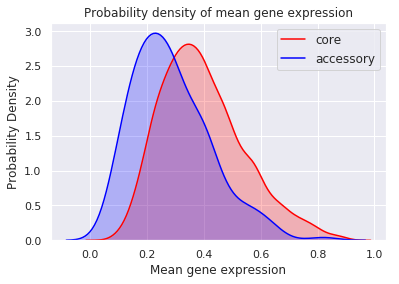

In [29]:
# Distribution plot for core genes
sns.distplot(mean_real_core_expression, 
             label='core', 
             color='red',
             hist = False, 
             kde = True,
             kde_kws = {'shade': True}
            )

sns.distplot(mean_real_acc_expression,
             label='accessory',
             color='blue',
             hist = False, 
             kde = True,
             kde_kws = {'shade': True}
            )

plt.legend(prop={'size': 12})
plt.title('Probability density of mean gene expression')
plt.ylabel('Probability Density')
plt.xlabel('Mean gene expression')

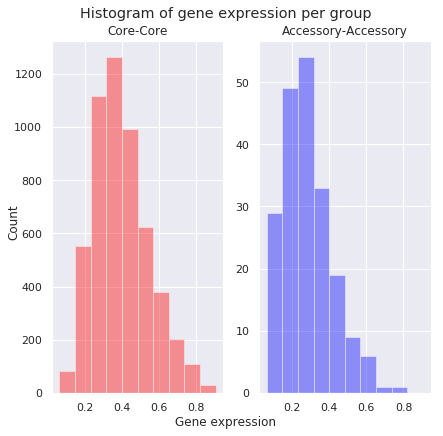

In [30]:
# Get bins using all data
hist, bins_expression = np.histogram(np.concatenate([mean_real_core_expression,
                                              mean_real_acc_expression]))


# Set up the matplotlib figure
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(6,6))

# Distribution plot for core genes
sns.distplot(mean_real_core_expression, 
             label='core', 
             color='red',
             bins=bins_expression,
             kde=False,
             ax=axes[0]
            )

sns.distplot(mean_real_acc_expression,
             label='accessory',
             color='blue',
             bins=bins_expression,
             kde=False,
             ax=axes[1]
            )

plt.suptitle('Histogram of gene expression per group')
axes[0].set_title('Core-Core')
axes[1].set_title('Accessory-Accessory')
fig.text(0.5, 0.01, 'Gene expression', ha='center', fontsize=12)
fig.text(0.01, 0.5, 'Count', ha='center', rotation=90, fontsize=12)
plt.tight_layout(pad=0.4, 
                 w_pad=0.5,
                 h_pad=1.0,
                 rect=[0, 0.03, 1, 0.95])